# Principle Component Analysis (PCA)

Directions of maximum and minimum variance

In [1]:
import numpy as np
import matplotlib.pyplot as plt

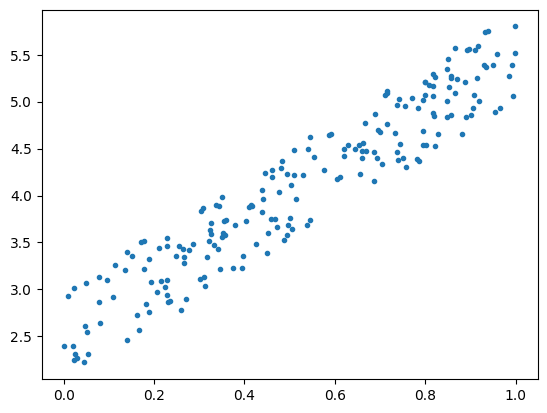

In [2]:
X = np.random.rand(202, 3)

X[:, 1] = X[:, 1] + 3*X[:, 0] + 2 # y = 3(x+2) + uniform(0, 1)

plt.plot(X[:, 0], X[:, 1], '.')

In [3]:
X[:, 0] = X[:, 0] - np.mean(X[:, 0])
X[:, 1] = X[:, 1] - np.mean(X[:, 1])

In [4]:
vals, e = np.linalg.eig(X.T@X)

vals, e

(array([175.24819443,   1.51343383,  65.47486688]),
 array([[ 2.90684483e-01,  9.56810910e-01, -3.92607795e-03],
        [ 9.56745423e-01, -2.90710567e-01, -1.12054226e-02],
        [ 1.18628229e-02,  4.99014639e-04,  9.99929510e-01]]))

In [5]:
first_component = e[:, 1]
second_component = e[:, 0]

(-0.5998768312128683,
 1.030938897582146,
 -2.055017060374404,
 1.8817555089865061)

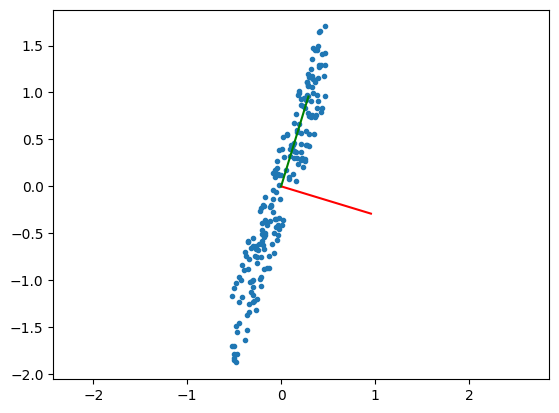

In [6]:
plt.plot(X[:, 0], X[:, 1], '.')
plt.plot([0, first_component[0]], [0, first_component[1]], 'r')
plt.plot([0, second_component[0]], [0, second_component[1]], 'g')
plt.axis('equal')

In [7]:
def get_pc(X):
    '''
        Return eigenvalues and eigenvectors of the covariance matrix
    '''
    cov = X.T@X
    vals, e = np.linalg.eig(cov)

    plt.plot(X[:, 0], X[:, 1], '.')
    plt.plot([0, e[0, 0]], [0, e[1, 0]], 'r')
    plt.plot([0, e[0, 1]], [0, e[1, 1]], 'g')
    plt.axis('equal')
    return vals, e

## Best fit line

the best fit line is found by minimizing

$$
\sum_{i=0}^{n} (y(x_i) - y_i)^2
$$

when $y(x_i) = ax + b$ we minimize

$$
\sum_{i=0}^{n} (ax_i + b - y_i)^2
$$

In [8]:
def line(c,x):
    if x is np.ndarray:
        return np.array([c[0]*x + c[1] for x in x])
    return c[0]*x + c[1]

In [9]:
def llsq(pts):
    if type(pts) != np.ndarray:
        # could further handle if shape is wrong. if not right shape, transpose it.
        print('pts is not an array')
        pts = np.array(pts).T
        pts = np.array([pts[:,0], np.ones(len(pts))]).T
        ys = pts[:,1]
    else:
        # could further handle if shape is wrong. if not right shape, transpose it.
        ys = pts[:,1]
        pts = np.array([pts[:,0], np.ones(len(pts))]).T
    
    c = np.linalg.solve(pts.T@pts, pts.T@ys)
    plt.title('Linear Least Squares Demo')
    plt.plot(pts[:,0], line(c, pts[:,0]), label=f'slope = {c[0]:0.0f}, intercept = {c[1]:0.1f}')
    plt.plot(pts[:,0], ys, '.', label='data')
    plt.grid()
    plt.legend()
    return c

In [10]:
print('Shape of X =',': 202 rows and 3 columns')
print(X.shape, end='\n\n')
print('Shape of X tranpose',': 3 rows and 202 columns')
print(X.T.shape)

Shape of X = : 202 rows and 3 columns
(202, 3)

Shape of X tranpose : 3 rows and 202 columns
(3, 202)


this is an ndarray, and the function llsq uses input[:, 0] for xs.

therefore we need to transpose X to get the correct shape.

(array([175.24819443,   1.51343383,  65.47486688]),
 array([[ 2.90684483e-01,  9.56810910e-01, -3.92607795e-03],
        [ 9.56745423e-01, -2.90710567e-01, -1.12054226e-02],
        [ 1.18628229e-02,  4.99014639e-04,  9.99929510e-01]]))

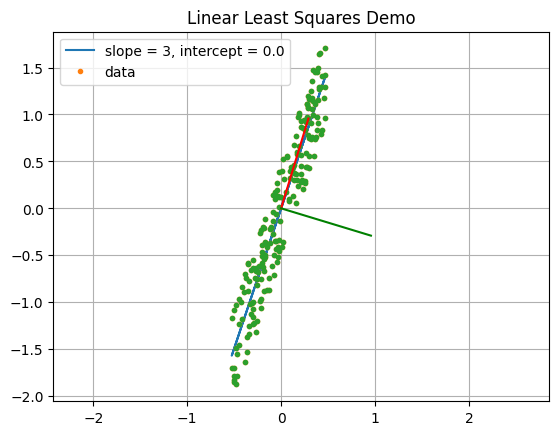

In [11]:
llsq(X)
get_pc(X)

# Line of best fit

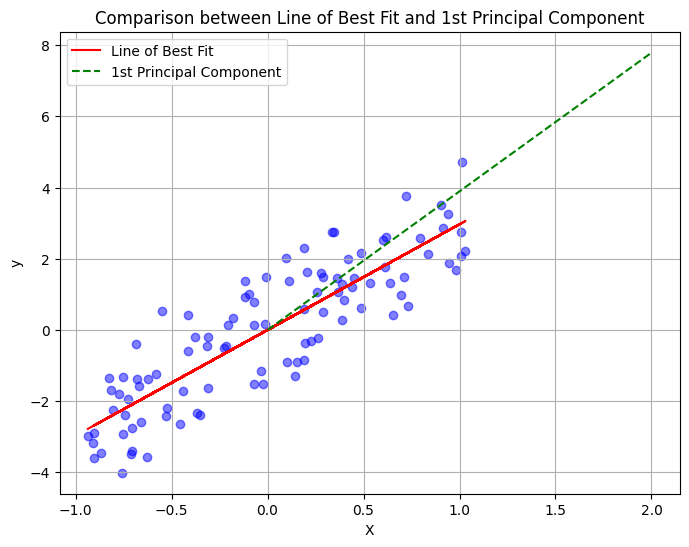

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA

# Generate synthetic data
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Normalize data
X = X - np.mean(X)
y = y - np.mean(y)

# Data for linear regression
reg = LinearRegression().fit(X, y)
y_pred = reg.predict(X)

# Now, PCA
data = np.hstack([X, y])
pca = PCA(n_components=1)
pca.fit(data)

# First principal component direction
first_pc = pca.components_[0]
line = np.linspace(0, 2, 100).reshape(-1, 1)
first_pc_line = first_pc[1]/first_pc[0] * line

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', alpha=0.5)
plt.plot(X, y_pred, color='red', label='Line of Best Fit')
plt.plot(line, first_pc_line, color='green', linestyle='--', label='1st Principal Component')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Comparison between Line of Best Fit and 1st Principal Component')
plt.legend()
plt.grid(True)
plt.show()

## Linear Regression

$$
\text{cost}(a,b) = \sum_{i=1}^{n} (y_i - (a + b x_i))^2
$$

Where $a,b$ the intercept and slope of our line

In [13]:
import numpy as np
from sklearn.linear_model import LinearRegression

def trial():
    # Generating random data
    X = np.random.rand(100, 1)
    y = 4 + 3 * X + np.random.randn(100, 1)

    # Calling Linear Regression
    reg = LinearRegression().fit(X, y)

    #  Return slope and intercept
    return reg.coef_[0][0], reg.intercept_[0]

In [14]:
ms = []
cs = []
for _ in range(1000):
    m, c = trial()
    ms.append(m)
    cs.append(c)

True equation: y = 4 + 3x + noise


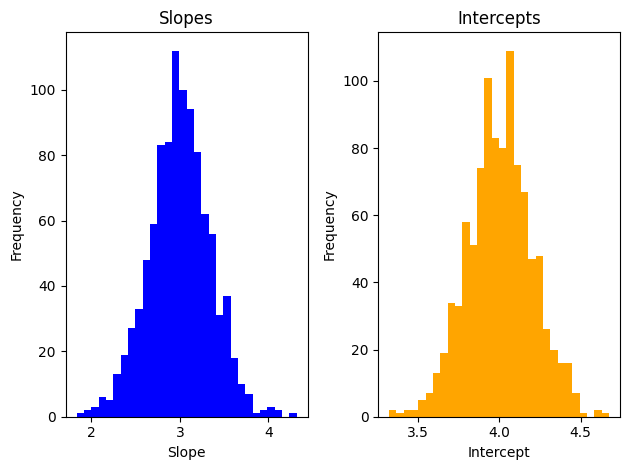

In [15]:
print("True equation: y = 4 + 3x + noise")

from matplotlib import style
plt.subplot(1, 2, 1)
plt.hist(ms, bins=30, color='blue')
plt.title('Slopes')
plt.xlabel('Slope')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(cs, bins=30, color='orange')
plt.title('Intercepts')
plt.xlabel('Intercept')
plt.ylabel('Frequency')
style.use('ggplot')
plt.tight_layout()
plt.show()

**The essence of Principle Component Analysis is captured by:**

$$
\sum_{i=1}^{n} (\mathbf{x}_i \cdot \mathbf{v})^2 \quad \text{subject to} \quad \|\mathbf{v}\|_2 = 1
$$

In [16]:
from sklearn.decomposition import PCA

# Applying PCA
data = np.hstack([X, y])
pca = PCA(n_components=2)
pca.fit(data)

print(pca.components_)

# component from np.eig()

vals, e = np.linalg.eig(data.T@data)
vals, e

[[ 0.24873551  0.96857145]
 [-0.96857145  0.24873551]]


(array([  7.90211184, 417.5558845 ]),
 array([[-0.96857145, -0.24873551],
        [ 0.24873551, -0.96857145]]))

## Comparison to Linear Regression

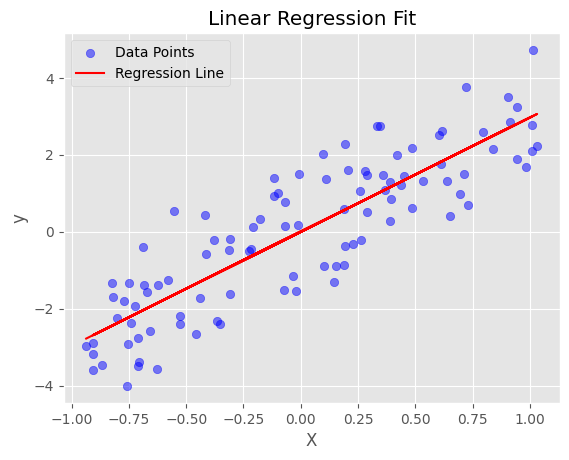

In [17]:
import matplotlib.pyplot as plt

plt.scatter(X, y, color='blue', alpha=0.5, label='Data Points')
plt.plot(X, reg.predict(X), color='red', label='Regression Line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression Fit')
plt.legend()
plt.show()


## PCA
indicates the direction of maximum variance.

To retrieve this component:

In [18]:
first_component = pca.components_[0]
second_component = pca.components_[1]

print('First Principal Component:', first_component)

First Principal Component: [0.24873551 0.96857145]


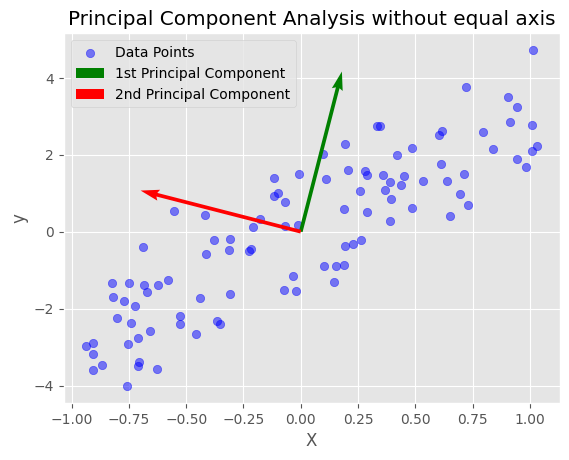

In [19]:
plt.scatter(X-np.mean(X), y-np.mean(y), color='blue', alpha=0.5, label='Data Points')
plt.quiver(0, 0, first_component[0], first_component[1], color='green', scale=3, label='1st Principal Component')
plt.quiver(0, 0, second_component[0], second_component[1], color='red', scale=3, label='2nd Principal Component')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Principal Component Analysis without equal axis')
# plt.axis('equal')
plt.legend()
plt.show()

notice the difference in the x-axis scale

the red vector indicates direction of minumum variance

green vector indicates direction of maximum variance

notice the difference in the y-axis scale

and the directions of the vectors.

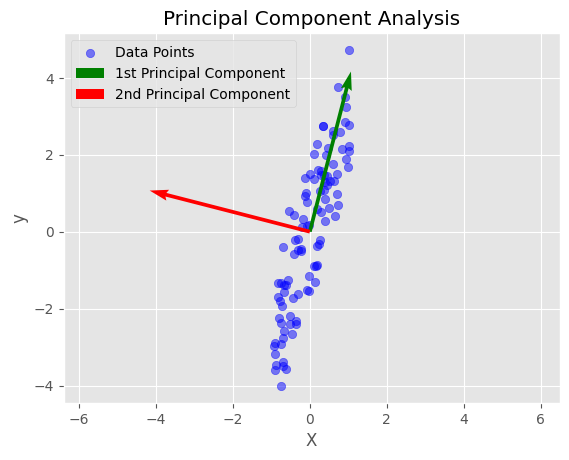

In [20]:
plt.scatter(X-np.mean(X), y-np.mean(y), color='blue', alpha=0.5, label='Data Points')
plt.quiver(0, 0, first_component[0], first_component[1], color='green', scale=3, label='1st Principal Component')
plt.quiver(0, 0, second_component[0], second_component[1], color='red', scale=3, label='2nd Principal Component')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Principal Component Analysis')
plt.axis('equal')                       #  EQUAL AXIS SCALING
plt.legend()
plt.show()

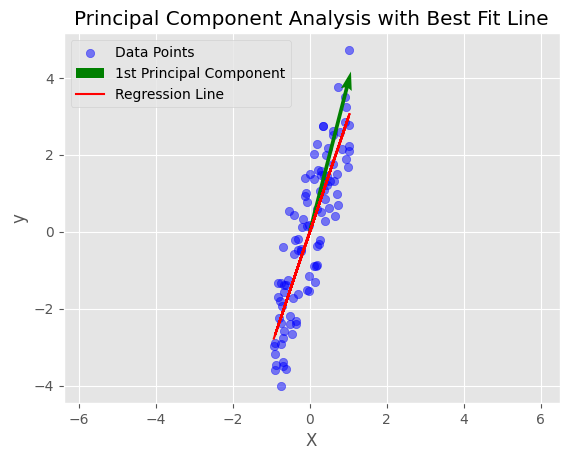

In [21]:
plt.scatter(X, y, color='blue', alpha=0.5, label='Data Points')
plt.quiver(pca.mean_[0], pca.mean_[1], first_component[0], first_component[1], color='green', scale=3, label='1st Principal Component')
plt.plot(X, reg.predict(X), color='red', label='Regression Line')
plt.xlabel('X')
plt.ylabel('y')
plt.axis('equal')
plt.title('Principal Component Analysis with Best Fit Line')
plt.legend()
plt.show()

# The best fit lines for $ Y(X) $ and $ X(Y) $ are not necessarily the same.

Linear regression for $ Y $ as a function of $ X $, minimize the vertical distances.Residuals (errors) are computed in the $ Y $ direction.

Linear regression for $ X $ as a function of $ Y $, minimize the horizontal distances. Residuals are computed in the $ X $ direction.

Because of this difference in the orientation of the residuals, the best fit lines for $ Y(X) $ and $ X(Y) $ can be different.

A line that is invariant to the roles of $ X $ and $ Y $, reduced major axis regression or orthogonal regression. Line will be the same regardless of which variable is treated as the dependent variable.


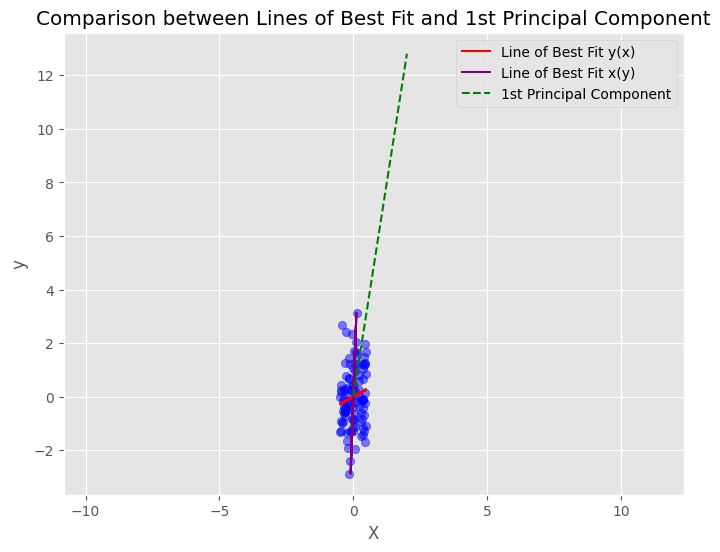

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA

X =  np.random.rand(100, 1)
y = X + np.random.randn(100, 1)

# Normalize data
X = X - np.mean(X)
y = y - np.mean(y)

# Data for linear regression
reg = LinearRegression().fit(X, y)
y_pred = reg.predict(X)

# Data for linear regression
reg_opp = LinearRegression().fit(y, X)
X_pred_opp = reg_opp.predict(y)

# PCA
data = np.hstack([X, y])
pca = PCA(n_components=1)
pca.fit(data)

# First principal component direction
first_pc = pca.components_[0]
line = np.linspace(0, 2, 100).reshape(-1, 1)
first_pc_line = first_pc[1]/first_pc[0] * line

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', alpha=0.5)
plt.plot(X, y_pred, color='red', label='Line of Best Fit y(x)')
plt.plot(X_pred_opp, y, color='purple', label='Line of Best Fit x(y)')
plt.plot(line, first_pc_line/4, color='green', linestyle='--', label='1st Principal Component')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Comparison between Lines of Best Fit and 1st Principal Component')
plt.legend()
plt.axis('equal')
plt.grid(True)
plt.show()

# Summary

1. **Least Squares Regression (LLSQ) for $Y(X)$ and $X(Y)$:**
    - When you use LLSQ for $Y(X)$, you're minimizing the sum of the squared vertical distances between the data points and the line.
    - When you use LLSQ for $X(Y)$, you're minimizing the sum of the squared horizontal distances.
    - As mentioned earlier, these two lines can be different, especially if the data isn't perfectly linear.



2. **Principal Component Analysis (PCA):**
    - PCA finds the directions (principal components) in which the data varies the most. The first principal component is the direction of maximum variance.
    - If you project the data onto the first principal component, you get a line that is equivalent to the best fit line by minimizing the orthogonal (perpendicular) distances from the data points to this line. This is sometimes referred to as "orthogonal regression" or "total least squares."
    - The line obtained from PCA would be the same regardless of whether you look at $Y(X)$ or $X(Y)$ because it's considering variance in both dimensions equally and is not biased toward the x-axis or y-axis.



**Comparison**:

- The LLSQ regression line for $Y(X)$ is typically different from the PCA line, because the former minimizes vertical distances, while the latter **minimizes orthogonal distances.**
  
- The LLSQ regression line for $X(Y)$ is also typically different from the PCA line, because it minimizes horizontal distances.
  
- If you compare the LLSQ lines for $Y(X)$ and $X(Y)$, they are generally not the same either, unless the data has certain symmetries.
  
- The PCA line, on the other hand, remains the same regardless of whether you're looking at $Y(X)$ or $X(Y)$ because it's oriented in the direction of maximum variance in the data.


In [31]:
style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

(array([ 18.42911968, 544.03885236]),
 array([[-0.93962119, -0.34221634],
        [ 0.34221634, -0.93962119]]))

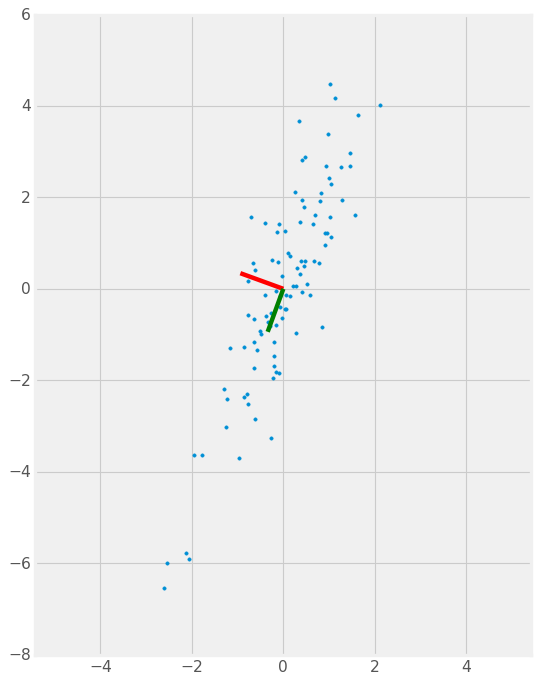

In [47]:
from numpy.linalg import eig
from numpy import transpose, cov, mean, array, dot
from numpy.random import randn
from matplotlib.pyplot import plot, axis, scatter, show, legend, title, figure
figure(figsize=(8, 10))

# Generate data
x = randn(100)
y = 2*x + randn(100)

# Center data
x = x - mean(x)
y = y - mean(y)

style.use('fivethirtyeight')

get_pc(array([x, y]).T, )